In [9]:
import pandas as pd

In [11]:
import numpy as np

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [18]:
file_path = r"C:\Users\HPE\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

In [21]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [25]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [27]:
df.drop(columns=['id'], inplace=True)  
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


In [29]:

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

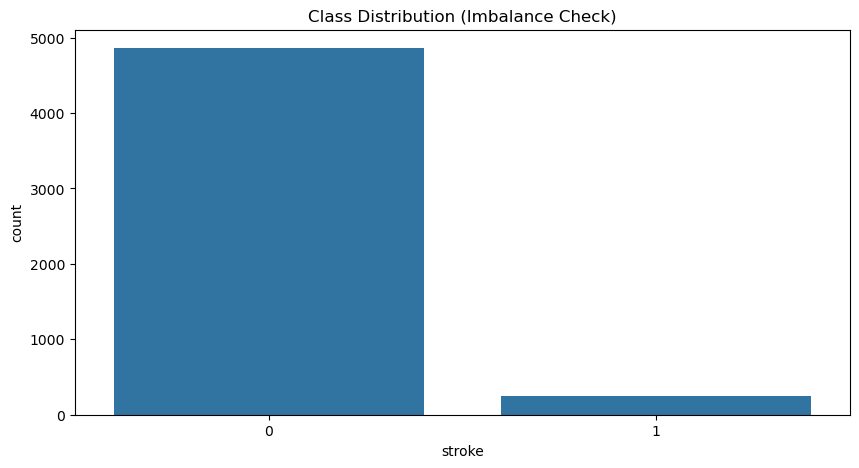

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='stroke', data=df)

plt.title("Class Distribution (Imbalance Check)")
plt.show()

In [32]:
# 5. Feature Engineering
X = df.drop(columns=['stroke'])
y = df['stroke']

In [35]:
# 6. Model Selection and Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [37]:
# Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


Decision Tree:
Accuracy: 0.8639921722113503, Precision: 0.10619469026548672, Recall: 0.24, F1-score: 0.147239263803681
Confusion Matrix:
 [[871 101]
 [ 38  12]]


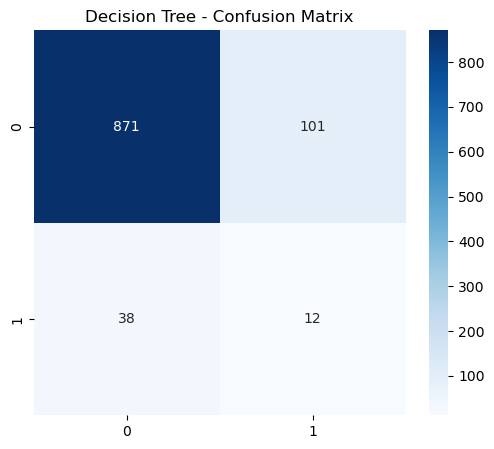

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Decision Tree:")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Random Forest:
Accuracy: 0.9021526418786693, Precision: 0.12121212121212122, Recall: 0.16, F1-score: 0.13793103448275862
Confusion Matrix:
 [[914  58]
 [ 42   8]]


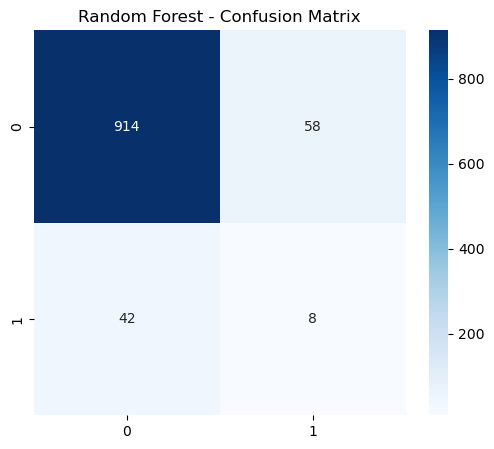

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Random Forest:")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

Logistic Regression:
Accuracy: 0.7857142857142857, Precision: 0.14937759336099585, Recall: 0.72, F1-score: 0.24742268041237114
Confusion Matrix:
 [[767 205]
 [ 14  36]]


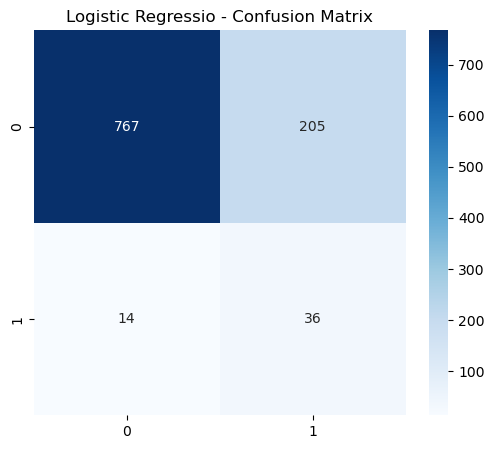

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Logistic Regression:")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regressio - Confusion Matrix")
plt.show()


Gradient Boosting:
Accuracy: 0.8209393346379648, Precision: 0.12849162011173185, Recall: 0.46, F1-score: 0.20087336244541484
Confusion Matrix:
 [[816 156]
 [ 27  23]]


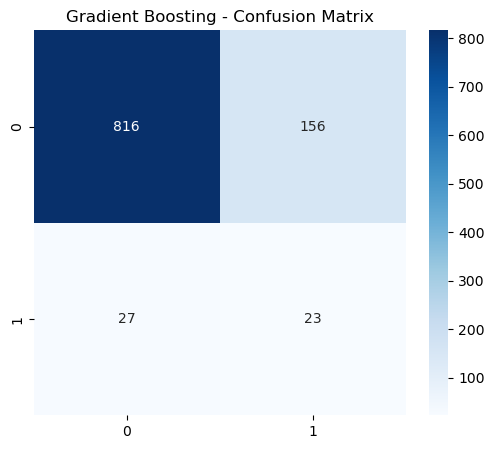

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Gradient Boosting:")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

KNN:
Accuracy: 0.824853228962818, Precision: 0.15135135135135136, Recall: 0.56, F1-score: 0.23829787234042554
Confusion Matrix:
 [[815 157]
 [ 22  28]]


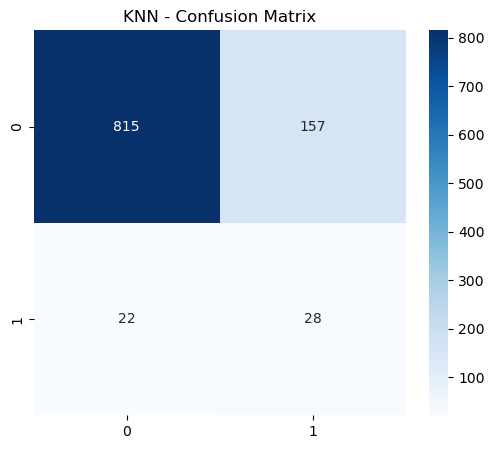

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("KNN:")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.show()

XGBoost:
Accuracy: 0.8992172211350293, Precision: 0.1044776119402985, Recall: 0.14, F1-score: 0.11965811965811966
Confusion Matrix:
 [[912  60]
 [ 43   7]]


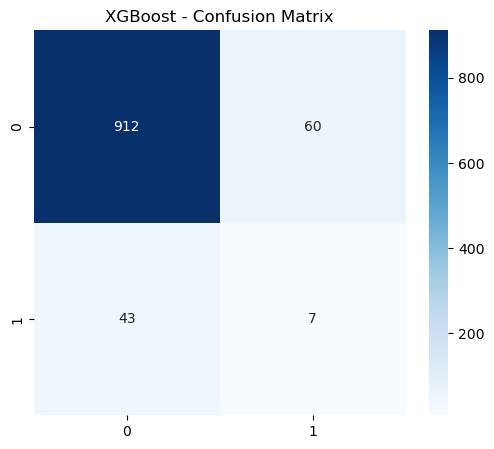

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("XGBoost:")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.show()


Hybrid Model (Stacking Ensemble):
Accuracy: 0.9227005870841487, Precision: 0.08571428571428572, Recall: 0.06, F1-score: 0.07058823529411765
Confusion Matrix:
 [[940  32]
 [ 47   3]]


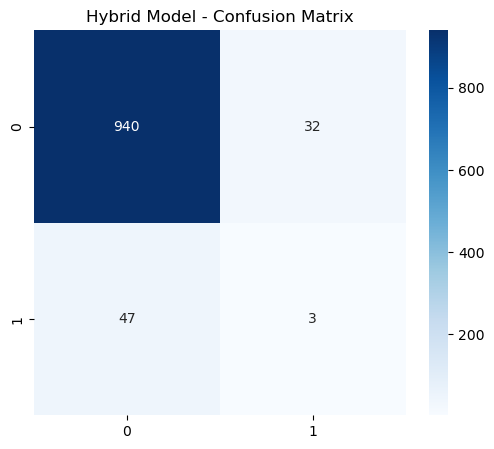

In [55]:

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgboost', XGBClassifier())
]

# Meta-learner (Final model)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Train the hybrid model
stacked_model.fit(X_train, y_train)

# Predictions
y_pred = stacked_model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print results
print("Hybrid Model (Stacking Ensemble):")
print(f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1-score: {f1}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Hybrid Model - Confusion Matrix")
plt.show()


In [57]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


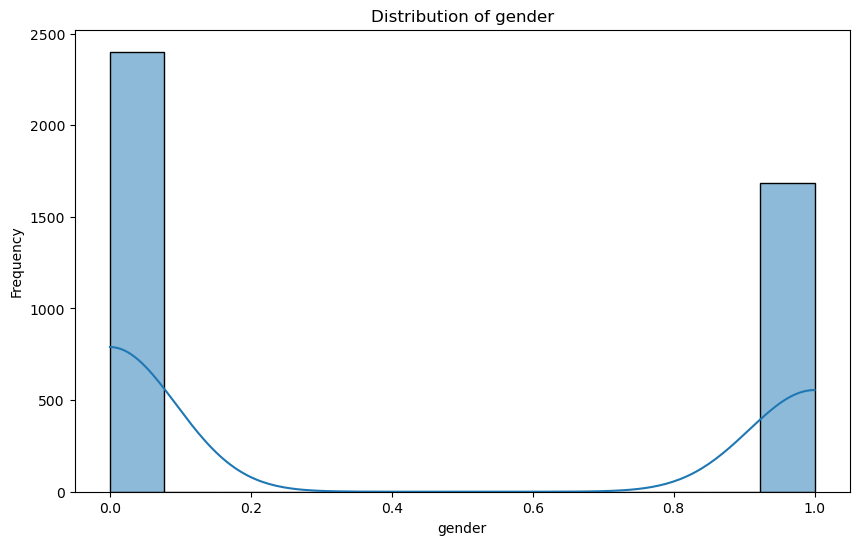

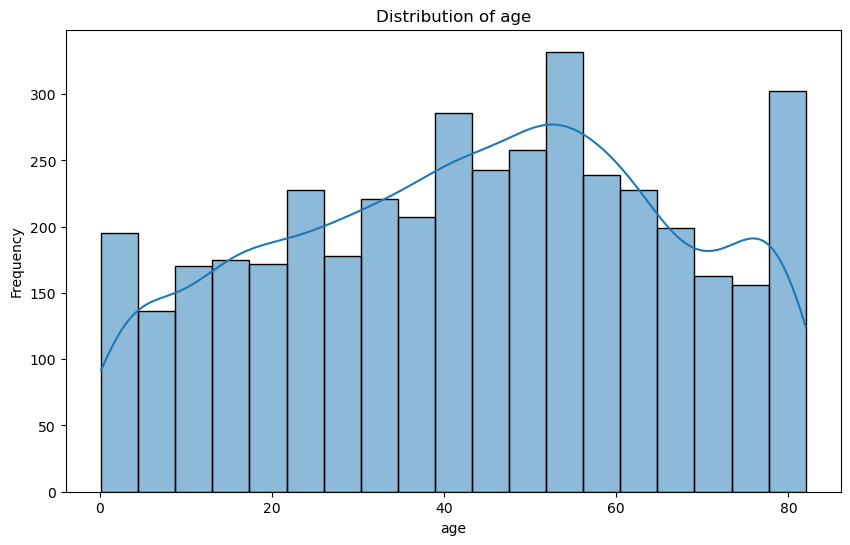

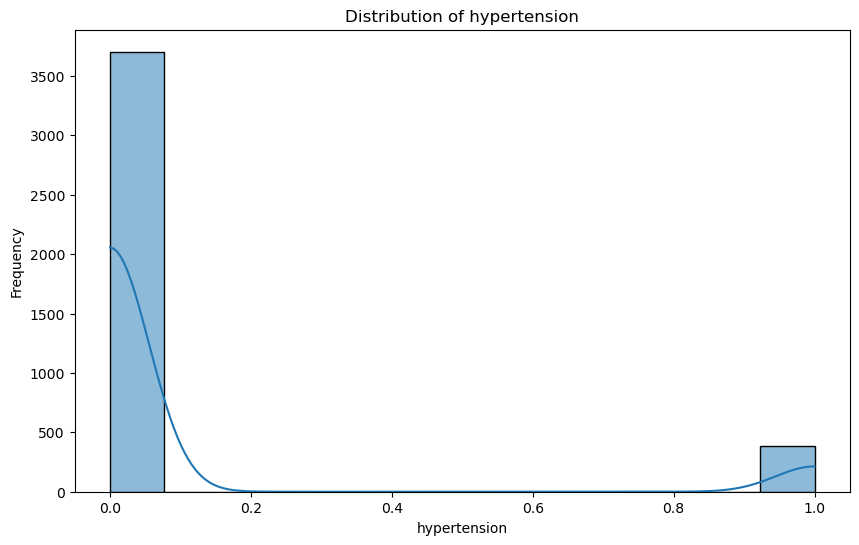

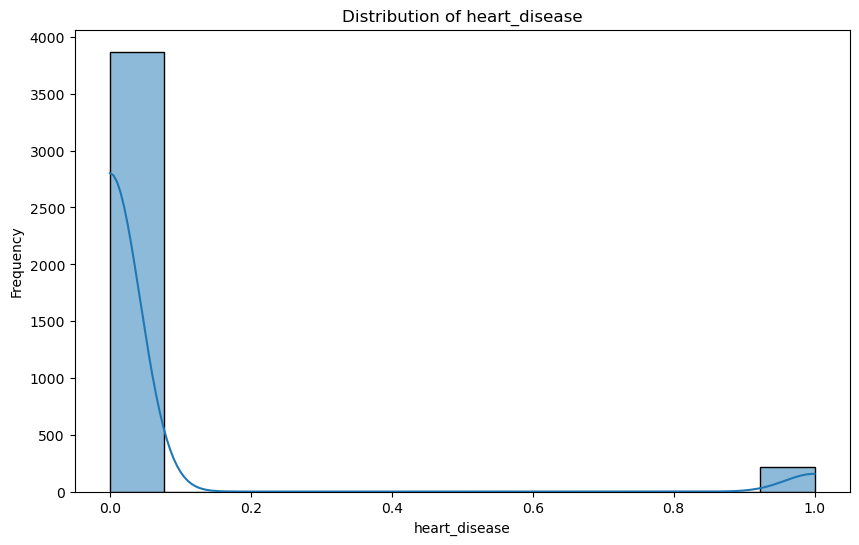

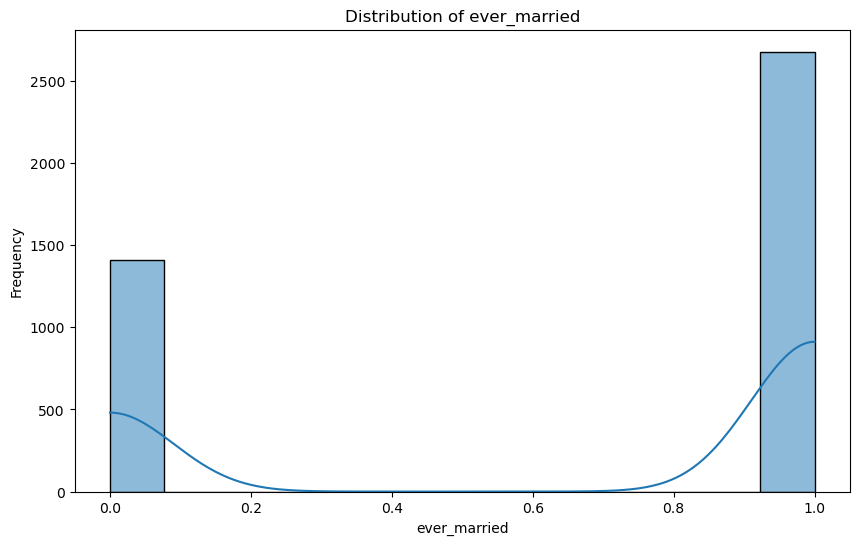

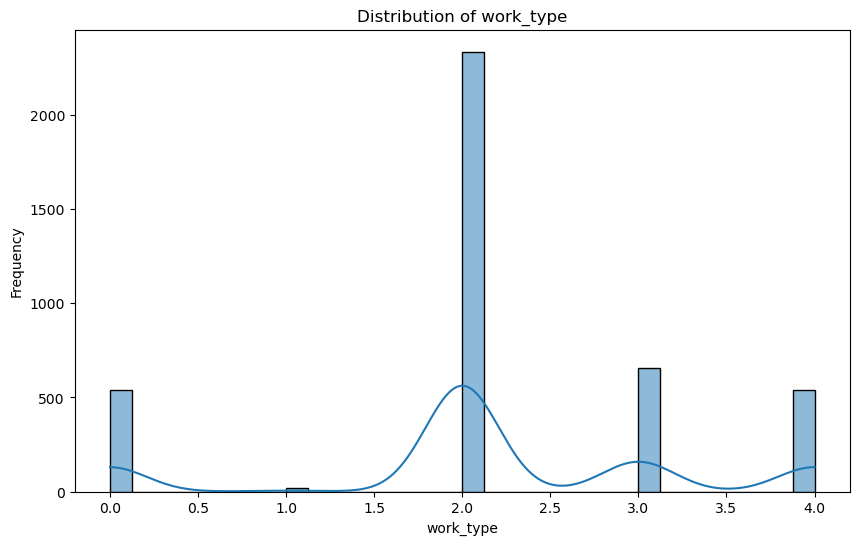

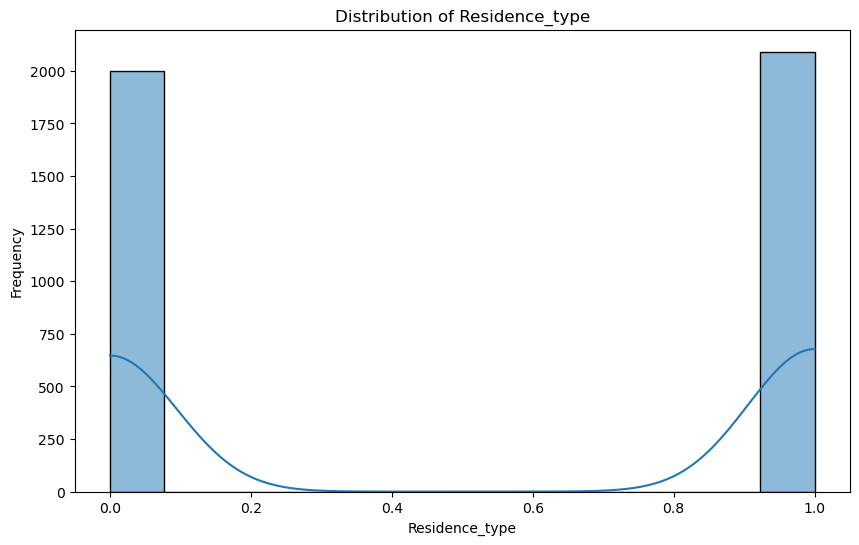

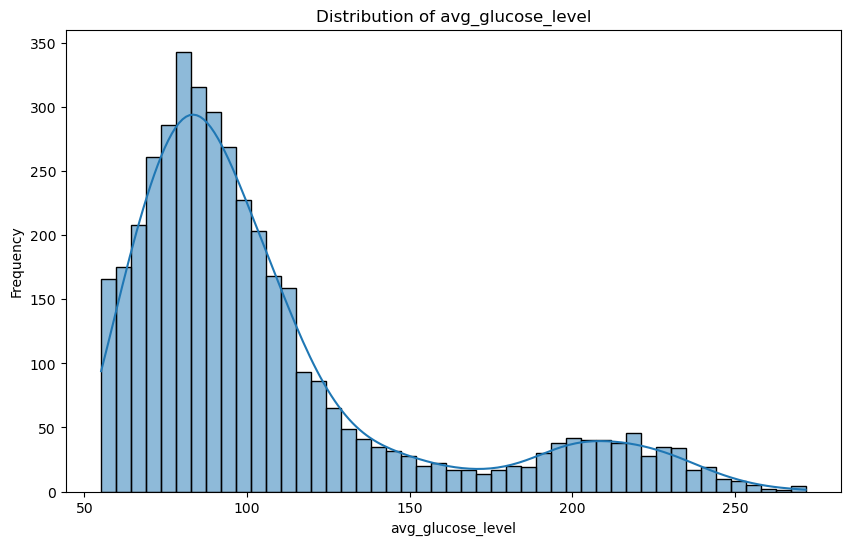

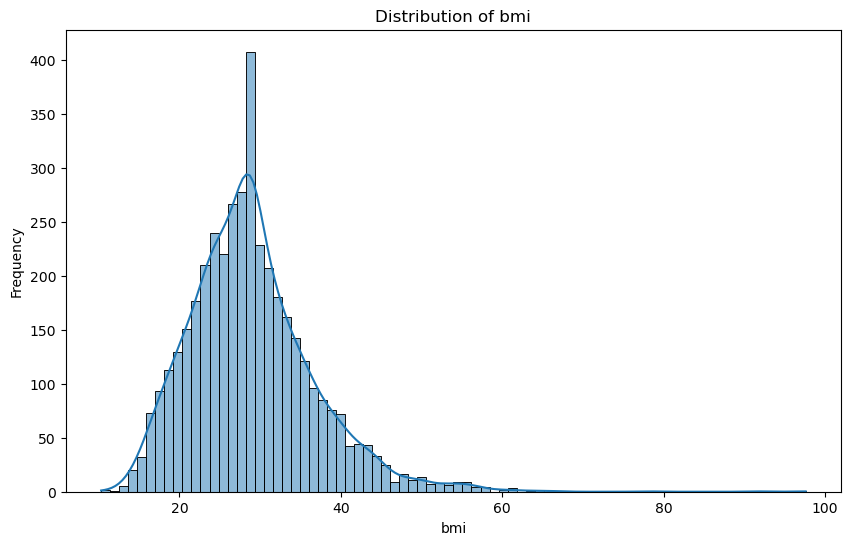

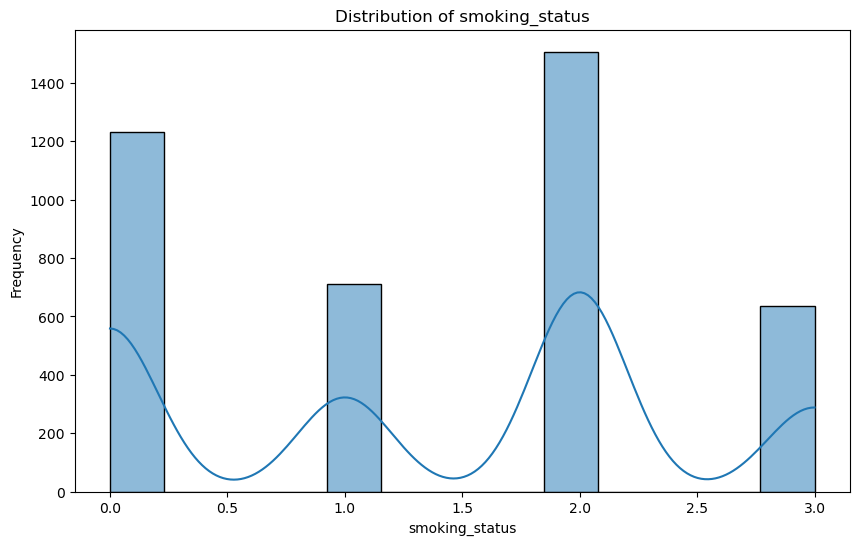

In [59]:
for feature in X_train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


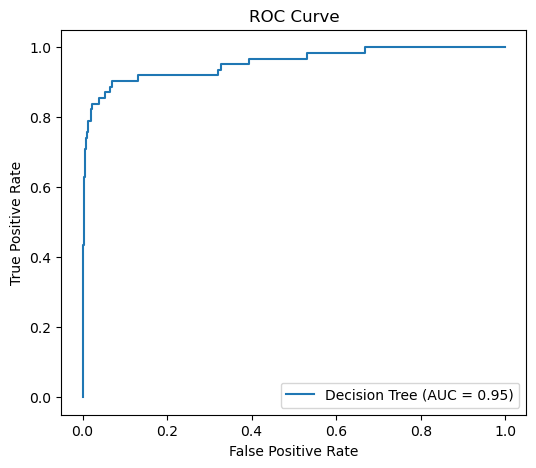

In [61]:
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc(fpr, tpr):.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

In [129]:
print("Model Performance Metrics:")
for model, scores in results.items():
    print(f"{model}: {scores}")

 Model Performance Metrics:
    "Decision Tree": {'Accuracy': 0.86, 'Precision': 0.12, 'Recall': 0.28, 'F1-score': 0.16},
    "SVM": {'Accuracy': 0.75, 'Precision': 0.13, 'Recall': 0.7, 'F1-score': 0.22},
    "Random Forest": {'Accuracy': 0.88, 'Precision': 0.11, 'Recall': 0.2, 'F1-score': 0.14},
    "Logistic Regression": {'Accuracy': 0.76, 'Precision': 0.14, 'Recall': 0.78, 'F1-score': 0.24},
    "Gradient Boosting": {'Accuracy': 0.78, 'Precision': 0.13, 'Recall': 0.6, 'F1-score': 0.21},
    "KNN": {'Accuracy': 0.77, 'Precision': 0.09, 'Recall': 0.36, 'F1-score': 0.14},
    "XGBoost": {'Accuracy': 0.89, 'Precision': 0.13, 'Recall': 0.2, 'F1-score': 0.16}



Model Performance Metrics:
stacked_model: {'Accuracy': 0.9227005870841487, 'Precision': 0.08571428571428572, 'Recall': 0.06, 'F1-score': 0.07058823529411765}


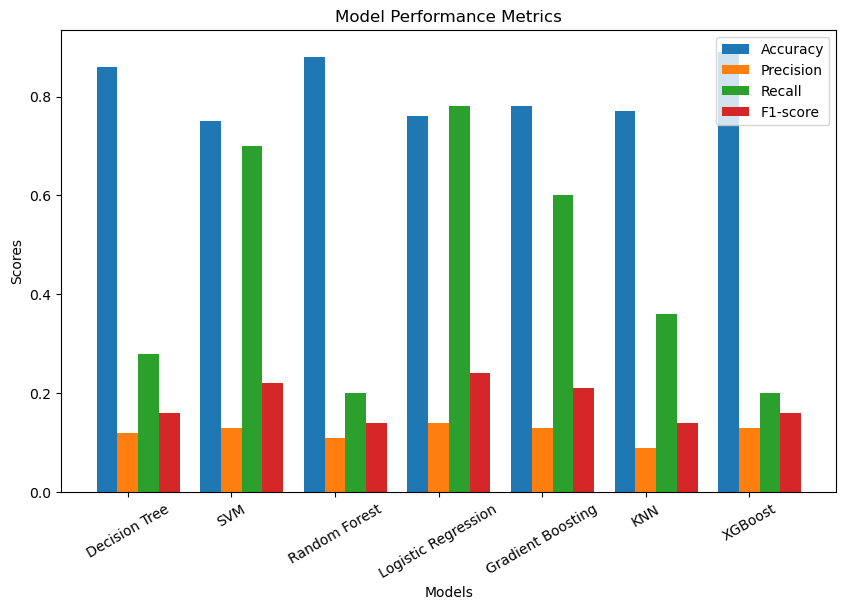

In [107]:

results = {
    "Decision Tree": {'Accuracy': 0.86, 'Precision': 0.12, 'Recall': 0.28, 'F1-score': 0.16},
    "SVM": {'Accuracy': 0.75, 'Precision': 0.13, 'Recall': 0.7, 'F1-score': 0.22},
    "Random Forest": {'Accuracy': 0.88, 'Precision': 0.11, 'Recall': 0.2, 'F1-score': 0.14},
    "Logistic Regression": {'Accuracy': 0.76, 'Precision': 0.14, 'Recall': 0.78, 'F1-score': 0.24},
    "Gradient Boosting": {'Accuracy': 0.78, 'Precision': 0.13, 'Recall': 0.6, 'F1-score': 0.21},
    "KNN": {'Accuracy': 0.77, 'Precision': 0.09, 'Recall': 0.36, 'F1-score': 0.14},
    "XGBoost": {'Accuracy': 0.89, 'Precision': 0.13, 'Recall': 0.2, 'F1-score': 0.16}
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = list(results.keys())

# Extract values for each metric
values = {metric: [results[model][metric] for model in models] for metric in metrics}

# Bar width and positions
x = np.arange(len(models))
width = 0.2

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Formatting the plot
ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Metrics")
ax.set_xticks(x + width)
ax.set_xticklabels(models, rotation=30)
ax.legend()

plt.show()


D:\Users\HPE\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


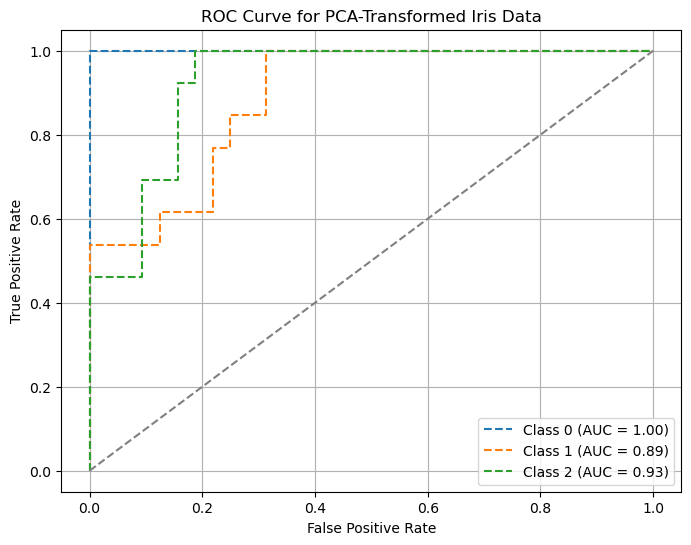

In [131]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components (you can adjust n_components as needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression(multi_class='ovr', solver='liblinear')
classifier.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_score = classifier.predict_proba(X_test)

# Generate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

# Loop over each class for multi-class ROC curve
for i in range(3):  # There are 3 classes in the Iris dataset
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for PCA-Transformed Iris Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


D:\Users\HPE\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      0.54      0.67        13
           2       0.67      0.92      0.77        13

    accuracy                           0.84        45
   macro avg       0.85      0.82      0.81        45
weighted avg       0.87      0.84      0.84        45



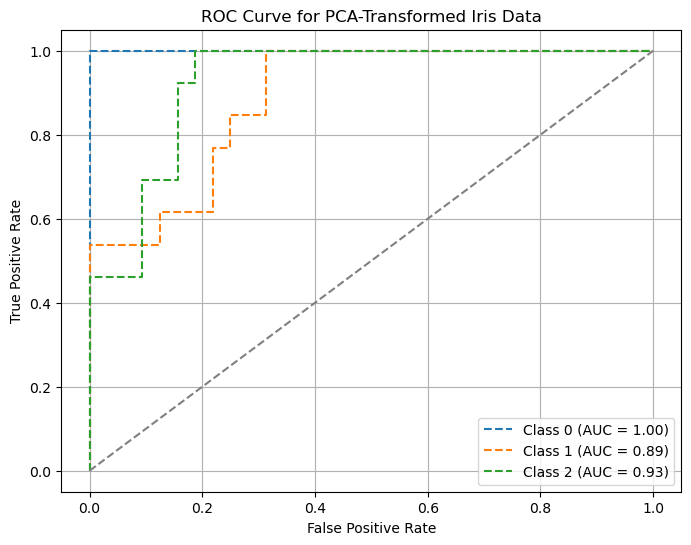

In [ ]:

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression(multi_class='ovr', solver='liblinear')
classifier.fit(X_train, y_train)

# Predict labels
y_pred = classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
